In [1]:
import numpy as np
import openfermion
from openfermion.chem import MolecularData
from openfermionqchem import run_qchem
import qeom

In [2]:
def print_result(bond,energy):   
    string1,string2 = "Total Energy\n","Excitation Energy\n"
    
    for i in range(len(bond)):
        string1 += "{:4.2f}".format(bond[i])
        string2 += "{:4.2f}".format(bond[i])

        for j in range(len(energy[i])):
            string1 += "{:15.10f}".format(energy[i][j])
        string1 += '\n'

        for j in range(1,len(energy[i])):
            string2 += "{:15.10f}".format((energy[i][j] - energy[i][0]) * 27.211324570273)
        string2 += '\n'
        
    print(string1+'\n'+string2)

## H4/STO-3G

In [3]:
# Set molecule parameters.
# We do not run calculations through OpenFermion directly.
basis        = 'sto-3g'
multiplicity = 1

# Generate molecule at different bond lengths.
bond_length_interval = 0.05
n_points = 14
singlet  = []
triplet  = []
bond_lengths = []

for point in range(n_points):
    bond_length    = 1.75 + point * bond_length_interval
    geometry       = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule       = MolecularData(geometry, basis, multiplicity)
    directory      = "/Users/yongbinkim/Desktop/venv/publish/qeom-davidson/OpenFermion-QChem/examples/"
    system         = 'H4/eom-ccsd/sto-3g/'+str(round(bond_length,3)).ljust(4,"0")+'/'
    molecule       = run_qchem(molecule,file_directory=directory+system,output_name='test_qis')

    print("r = {:4.2f}".format(bond_length))
    bond_lengths.append(bond_length)
    
    # ground state
    gs = qeom.Adapt_VQE(molecule)
    gs.run()
    
    qeom_davidson = qeom.DavidsonVar(gs=gs)
    
    # singlet
    user_guess = [[[0,1,2,5],[0,1,3,4]],[[0,1,2,7],[0,1,3,6]],[[0,1,4,5]]]
    qeom_davidson.run(nroot=3,user_guess=user_guess,spin='singlet',level=4)
    singlet.append(qeom_davidson.energy)

    # triplet
    qeom_davidson.run(nroot=2,spin='triplet',level=4)
    triplet.append(qeom_davidson.energy)
    
singlet      = np.array(singlet)
triplet      = np.array(triplet)   
bond_lengths = np.array(bond_lengths)

r = 1.75
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun 10, 3007 (2019).          *
*     https://doi.org/10.1038/s41467-019-10988-2    *
*       https://github.com/asthanaa/adapt-vqe       *
*****************************************************
 ------------------------------------------------
      Iter   Energy (a.u.)  Gnorm      <S^2>     
 ------------------------------------------------
      1     -1.82952518     0.479      0.00
      2     -1.87614865     0.443      0.00
      3     -1.92577017     0.336      0.00
      4     -1.94379515     0.151      0.00
      5     -1.96292785     0.179      0.00
      6     -1.96520436     0.036      0.00
      7     -1.96526312     0.002     -0.00
      8     -1.96526312*    0.000     -0.00
 ------------------------------------------------
 SCF energy                   = -1.76954677
 ADAPT-VQE correl

      5     4    10       0.0937      -1.8064783277            4.4201126115
      6     4    11       0.0000      -1.8135830727            4.2267830885
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.813583    4.226783   0.00  + 0.14793|00110011> - 0.42919|00111100> + 0.25562|01011010> - 0.16929|01100110> - 0.16929|10011001> + 0.25562|10100101> - 0.45264|11000011> + 0.61679|11001100>
     2   -1.584202   10.468536   0.00  - 0.70376|11011000> + 0.70376|11100100>
     3   -1.452706   14.046713   0.00  - 0.53665|01111000> + 0.53665|10110100> - 0.45981|11010010> + 0.45981|11100001>

 qEOM-Davidson calculation: 27.33 s

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
**********************

      1     -1.84597414     0.473      0.00
      2     -1.89181306     0.446      0.00
      3     -1.94103129     0.340      0.00
      4     -1.95616717     0.156      0.00
      5     -1.97457552     0.172      0.00
      6     -1.97546176     0.022     -0.00
      7     -1.97546176*    0.000     -0.00
 ------------------------------------------------
 SCF energy                   = -1.78842885
 ADAPT-VQE correlation energy = -0.18703291
 ADAPT-VQE energy             = -1.97546176

 ADAPT-VQE calculation: 21.85 s

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  ResNorm     Total energy (a.u.)    Excitation energy (eV.)   
 -------------------------------------------------------------------------------------

      2     1     4       0.0457      -1.8973237508            2.2027314934
      3     1     6       0.0268      -1.8989889023            2.1574205172
      4     1     8       0.0000      -1.9000032996            2.1298174216
 Initial guess vectors
 |b2> =  + 0.70711|11010010> + 0.70711|11100001>
      1     2     2       0.2068      -1.6683008109            8.4347490473
      2     2     4       0.0231      -1.8675999440            3.0115556489
      3     2     6       0.0187      -1.8679307396            3.0025542613
      4     2     8       0.0000      -1.8683723968            2.9905361847
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.900003    2.129817   2.00  - 0.36651|01110010> - 0.36651|10110001> + 0.60324|11011000> + 0.60324|11100100>
     2   -1.868372    2.990536   2.00  - 0.49193

      2     1     4       0.0088      -1.5404153776           12.0422339853
      3     1     6       0.0034      -1.5407542891           12.0330117556
      4     1     8       0.0000      -1.5407743534           12.0324657792
 Initial guess vectors
 |b2> =  - 0.70711|11010010> + 0.70711|11100001>
      1     2     2       0.0350      -1.4193769599           15.3358496566
      2     2     4       0.0112      -1.4520702252           14.4462226038
      3     2     6       0.0088      -1.4521898324           14.4429679323
      4     2     8       0.0000      -1.4523130152           14.4396159643
 Initial guess vectors
 |b3> =  + 1.00000|11001100>
      1     5     1       0.3339      -1.4140222327           15.4815588757
      2     5     2       0.3171      -1.5141014395           12.7582710960
      3     5     3       0.3474      -1.5824241348           10.8991200597
      4     5     9       0.1672      -1.7557735749            6.1820521801
      5     5    10       0.0380      -1

      2     2     4       0.0119      -1.8761963768            2.9573754135
      3     2     6       0.0096      -1.8762860009            2.9549366230
      4     2     8       0.0000      -1.8763994115            2.9518505700
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.895744    2.425454   2.00  - 0.39545|01110010> - 0.39545|10110001> + 0.58540|11011000> + 0.58540|11100100>
     2   -1.876399    2.951851   2.00  - 0.49204|01111000> - 0.49204|10110100> + 0.50769|11010010> + 0.50769|11100001>

 qEOM-Davidson calculation: 7.78 s

r = 2.15
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun 10, 3007 (2019).          *
*     https://doi.org/10.1038/s41467-019-10

      2     2     4       0.0164      -1.4467966778           14.7266172289
      3     2     6       0.0131      -1.4470378552           14.7200544717
      4     2     8       0.0000      -1.4473149703           14.7125138031
 Initial guess vectors
 |b3> =  + 1.00000|11001100>
      1     5     1       0.3494      -1.3666949749           16.9062906654
      2     5     2       0.3240      -1.4805142043           13.8091186718
      3     5     3       0.3580      -1.5541209236           11.8061823400
      4     5     9       0.1815      -1.7391746944            6.7706241205
      5     5    10       0.0217      -1.7893839707            5.4043632077
      6     5    11       0.0000      -1.7897806285            5.3935696239
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.789781    5.393570   0.

*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun 10, 3007 (2019).          *
*     https://doi.org/10.1038/s41467-019-10988-2    *
*       https://github.com/asthanaa/adapt-vqe       *
*****************************************************
 ------------------------------------------------
      Iter   Energy (a.u.)  Gnorm      <S^2>     
 ------------------------------------------------
      1     -1.86522797     0.464      0.00
      2     -1.90925821     0.454      0.00
      3     -1.95886693     0.352      0.00
      4     -1.97094662     0.167      0.00
      5     -1.99018185     0.171      0.00
      6     -1.99031122     0.009      0.00
      7     -1.99031122*    0.000      0.00
 ------------------------------------------------
 SCF energy                   = -1.81224571
 ADAPT-VQE correlation energy = -0.17806551
 ADAPT-VQE energy         

      6     5    11       0.0000      -1.7862430277            5.5780193516
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.786243    5.578019   0.00  + 0.29685|00110011> - 0.45434|00111100> + 0.28215|01011010> - 0.14428|01100110> - 0.13787|01101001> - 0.13787|10010110> - 0.14428|10011001> + 0.28215|10100101> - 0.47293|11000011> + 0.49278|11001100>
     2   -1.498059   13.419891   0.00  - 0.70637|11011000> + 0.70637|11100100>
     3   -1.440612   14.983096   0.00  - 0.53106|01111000> + 0.53106|10110100> - 0.46621|11010010> + 0.46621|11100001>

 qEOM-Davidson calculation: 33.58 s

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 ---

In [4]:
print("singlet")
print_result(bond_lengths,singlet)

singlet
Total Energy
1.75  -1.9652631233  -1.8186020987  -1.5934387746  -1.4508286301
1.80  -1.9689148382  -1.8135830727  -1.5842023768  -1.4527064994
1.85  -1.9723281769  -1.8090103747  -1.5750923343  -1.4537893517
1.90  -1.9754617591  -1.8049391168  -1.5661577485  -1.4541959382
1.95  -1.9782728236  -1.8013717682  -1.5574390023  -1.4540275783
2.00  -1.9807664879  -1.7982799205  -1.5489702869  -1.4533739388
2.05  -1.9829603171  -1.7956221175  -1.5407743534  -1.4523130152
2.10  -1.9848781650  -1.7933499096  -1.5328707196  -1.4509122193
2.15  -1.9865462555  -1.7914183899  -1.5252720656  -1.4492297550
2.20  -1.9879911055  -1.7897806285  -1.5179867419  -1.4473149703
2.25  -1.9892381735  -1.7883956514  -1.5110216589  -1.4452197026
2.30  -1.9903112215  -1.7872273897  -1.5043784727  -1.4429737500
2.35  -1.9912319226  -1.7862430277  -1.4980589027  -1.4406120342
2.40  -1.9920199071  -1.7854147283  -1.4920626538  -1.4381636676

Excitation Energy
1.75   3.9908407429  10.1178330359  13.9984439661


In [5]:
print("triplet")
print_result(bond_lengths,triplet)

triplet
Total Energy
1.75  -1.9652631233  -1.9086345867  -1.8497950344
1.80  -1.9689148382  -1.9061520030  -1.8555538109
1.85  -1.9723281769  -1.9038811061  -1.8604986391
1.90  -1.9754617591  -1.9018315967  -1.8647399062
1.95  -1.9782728236  -1.9000032996  -1.8683723968
2.00  -1.9807664879  -1.8983881515  -1.8714791706
2.05  -1.9829603171  -1.8969737395  -1.8741348891
2.10  -1.9848781650  -1.8957441734  -1.8763994115
2.15  -1.9865462555  -1.8946824646  -1.8783286279
2.20  -1.9879911055  -1.8937703741  -1.8799696275
2.25  -1.9892381735  -1.8929894924  -1.8813639775
2.30  -1.9903112215  -1.8923248009  -1.8825467072
2.35  -1.9912319226  -1.8917598812  -1.8835485764
2.40  -1.9920199071  -1.8912813112  -1.8843957574

Excitation Energy
1.75   1.5409374918   3.1420396466
1.80   1.7078598803   3.0847037075
1.85   1.8625354593   3.0430298490
1.90   2.0035742467   3.0128882768
1.95   2.1298174216   2.9905361847
2.00   2.2416236503   2.9738526620
2.05   2.3398086717   2.9612840442
2.10   2.425453

In [6]:
fci_energies = np.array([[-1.965263123,-1.908634752,-1.849795572,-1.818602242,-1.593438758,-1.450829873],
                         [-1.968914838,-1.906152050,-1.855553805,-1.813583235,-1.584203258,-1.452706681],
                         [-1.972338803,-1.903881184,-1.860498878,-1.809010509,-1.575092604,-1.453789849],
                         [-1.975466301,-1.901831712,-1.864740139,-1.804939588,-1.566157831,-1.454196242],
                         [-1.978274757,-1.900003261,-1.868372947,-1.801371968,-1.557439766,-1.454028039],
                         [-1.980767298,-1.898388234,-1.871480470,-1.798280085,-1.548970554,-1.453374521],
                         [-1.982960646,-1.896973923,-1.874135029,-1.795622094,-1.540774819,-1.452313431],
                         [-1.984878291,-1.895744554,-1.876399589,-1.793350847,-1.532870971,-1.450912492],
                         [-1.986546299,-1.894682638,-1.878328745,-1.791418790,-1.525272127,-1.449230438],
                         [-1.987991118,-1.893770289,-1.879969925,-1.789780942,-1.517987213,-1.447318252],
                         [-1.989238176,-1.892989944,-1.881364149,-1.788396124,-1.511021751,-1.445219994],
                         [-1.990311222,-1.892325015,-1.882546933,-1.787227656,-1.504378706,-1.442973732],
                         [-1.991231923,-1.891760110,-1.883548845,-1.786243226,-1.498059111,-1.440612182],
                         [-1.992019909,-1.891281399,-1.884396320,-1.785414899,-1.492062858,-1.438163580]])

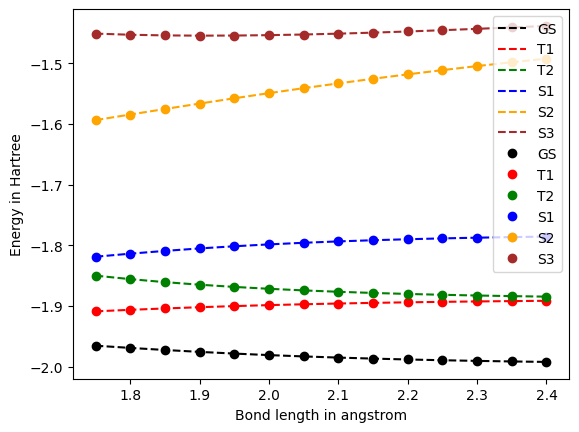

In [7]:
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies[:,0], '--', label='GS', color='black')
plt.plot(bond_lengths, fci_energies[:,1], '--', label='T1', color='red')
plt.plot(bond_lengths, fci_energies[:,2], '--', label='T2', color='green')
plt.plot(bond_lengths, fci_energies[:,3], '--', label='S1', color='blue')
plt.plot(bond_lengths, fci_energies[:,4], '--', label='S2', color='orange')
plt.plot(bond_lengths, fci_energies[:,5], '--', label='S3', color='brown')

plt.plot(bond_lengths, triplet[:,0], 'o', label='GS', color='black')
plt.plot(bond_lengths, triplet[:,1], 'o', label='T1', color='red')
plt.plot(bond_lengths, triplet[:,2], 'o', label='T2', color='green')
plt.plot(bond_lengths, singlet[:,1], 'o', label='S1', color='blue')
plt.plot(bond_lengths, singlet[:,2], 'o', label='S2', color='orange')
plt.plot(bond_lengths, singlet[:,3], 'o', label='S3', color='brown')

plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()

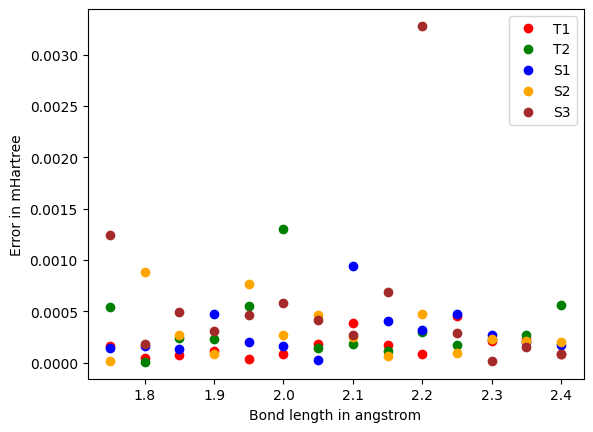

In [8]:
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, abs(fci_energies[:,1]-triplet[:,1])*1000, 'o', label='T1', color='red')
plt.plot(bond_lengths, abs(fci_energies[:,2]-triplet[:,2])*1000, 'o', label='T2', color='green')
plt.plot(bond_lengths, abs(fci_energies[:,3]-singlet[:,1])*1000, 'o', label='S1', color='blue')
plt.plot(bond_lengths, abs(fci_energies[:,4]-singlet[:,2])*1000, 'o', label='S2', color='orange')
plt.plot(bond_lengths, abs(fci_energies[:,5]-singlet[:,3])*1000, 'o', label='S3', color='brown')

plt.ylabel('Error in mHartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()